In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
with open('../data/all_tracker.pickle', 'rb') as f:
    activities = pd.DataFrame(pickle.load(f))

# Data Overview

In [5]:
activities.head()

,calories,distance,measurement_date,steps,user_id
0,0.00,0.00,2015-08-12 02:00:00,0,000025b9-60ab-44ec-9589-edd906cbf564
1,277.91,5.90,2015-08-24 02:00:00,7971,000025b9-60ab-44ec-9589-edd906cbf564
2,607.50,12.97,2015-08-25 02:00:00,17452,000025b9-60ab-44ec-9589-edd906cbf564
3,681.24,14.30,2015-08-26 02:00:00,19201,000025b9-60ab-44ec-9589-edd906cbf564
4,0.00,0.00,2015-08-27 02:00:00,0,000025b9-60ab-44ec-9589-edd906cbf564


In [6]:
printmd('**Total number of activity entries:** {}'.format(len(activities)))

**Total number of activity entries:** 7599898

# Statistical profile of activity data

**Original Data:**

* _Max Steps:_ 16777215

* _Min Steps:_ 0

* _Mean Steps:_ 8218.255721063624

* _Standard Deviation:_ 33718.759144637734 

**Remove noisy steps**

* Remove all entries with more than 62500 steps

* Number of entries removed: 11534

* Number of remaining activities entries: 7588364

**Filtered Data:**

* _Max Steps:_ 62488

* _Min Steps:_ 0

* _Mean Steps:_ 7859.353622994364

* _Standard Deviation:_ 6306.910060884817 

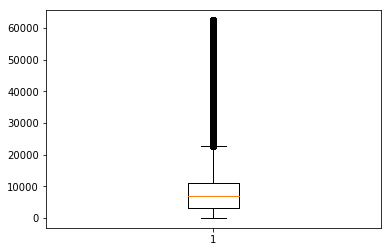

In [7]:
printmd('**Original Data:**')
printmd('* _Max Steps:_ {}'.format(activities['steps'].max()))
printmd('* _Min Steps:_ {}'.format(activities['steps'].min()))
printmd('* _Mean Steps:_ {}'.format(activities['steps'].mean()))
printmd('* _Standard Deviation:_ {} '.format(activities['steps'].std()))

#box = plt.boxplot(activities['steps'], 0)
#plt.show()

# In order to remove noisy entries, we consider a maximum of 62,500 steps per 
# activity entry, which corresponds in average to  50km.
steps_threshold = 62500
# outliers = box["fliers"][0].get_data()[1]

printmd('**Remove noisy steps**')
printmd('* Remove all entries with more than {} steps'.format(steps_threshold))
len_before = len(activities)
# activities_filter = activities[-activities.steps.isin(outliers)]
activities_filter = activities[activities.steps <= steps_threshold]
printmd('* Number of entries removed: {}'.format(len_before - len(activities_filter)))
printmd('* Number of remaining activities entries: {}'.format(len(activities_filter)))

printmd('**Filtered Data:**')
printmd('* _Max Steps:_ {}'.format(activities_filter['steps'].max()))
printmd('* _Min Steps:_ {}'.format(activities_filter['steps'].min()))
printmd('* _Mean Steps:_ {}'.format(activities_filter['steps'].mean()))
printmd('* _Standard Deviation:_ {} '.format(activities_filter['steps'].std()))

box = plt.boxplot(activities_filter['steps'], 0)
plt.show()


# Steps vs Distance

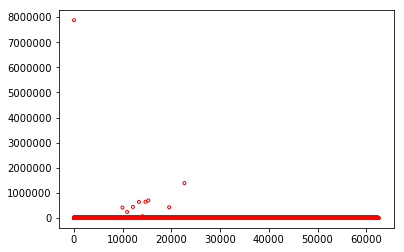

In [8]:
# Number of steps vs distance
plt.scatter(activities_filter['steps'], activities_filter['distance'], 
            marker='.', facecolors='none', edgecolors='r')
plt.show()
plt.figure(figsize=(10, 4), dpi=100)

In [9]:
printmd('** Remove entries with inconsistent steps/distance ratio.**')
printmd('_Stride should be between 40cm and 149cm._')
len_before = len(activities_filter)

activities_filter = activities_filter[
    (activities_filter.distance<=activities_filter.steps*0.00149) &
    (activities_filter.distance>=activities_filter.steps*0.00040)]

printmd('* Number of entries removed: {}'.format(len_before - len(activities_filter)))
printmd('* Number of remaining activities entries: {}'.format(len(activities_filter)))

** Remove entries with inconsistent steps/distance ratio.**

_Stride should be between 40cm and 149cm._

* Number of entries removed: 255042

* Number of remaining activities entries: 7333322

**Steps vs Distance after noise filter**

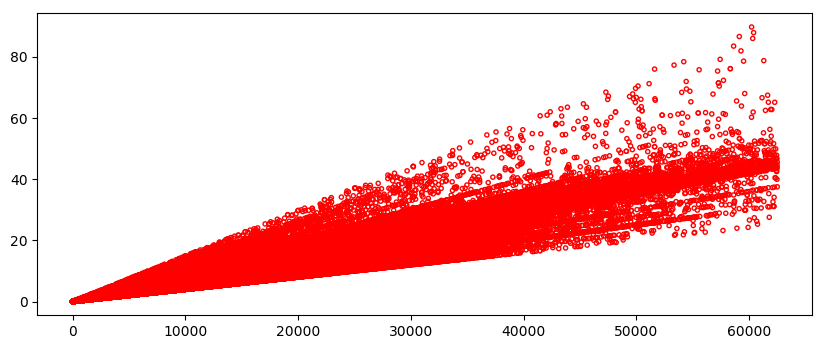

In [10]:
printmd('**Steps vs Distance after noise filter**')
plt.scatter(activities_filter['steps'], activities_filter['distance'], 
            marker='.', facecolors='none', edgecolors='r')
plt.show()
plt.figure(figsize=(10, 4), dpi=100)

# Steps vs Calories

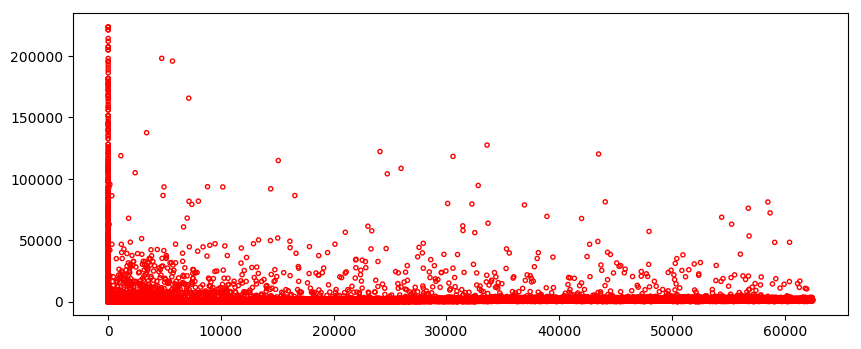

In [11]:
plt.scatter(activities_filter['steps'], activities_filter['calories'], 
            marker='.', facecolors='none', edgecolors='r')
plt.show()
plt.figure(figsize=(10, 4), dpi=100)

In [12]:
printmd('** Remove entries with inconsistent steps/distance ratio.**')
printmd('_Number of steps to burn one calorie should be between 15 and 45 steps._')

len_before = len(activities_filter)

activities_filter = activities_filter[
    (activities_filter.steps<=activities_filter.calories*45.) &
    (activities_filter.steps>=activities_filter.calories*15.)]

printmd('* Number of entries removed: {}'.format(len_before - len(activities_filter)))
printmd('* Number of remaining activities entries: {}'.format(len(activities_filter)))

** Remove entries with inconsistent steps/distance ratio.**

_Number of steps to burn one calorie should be between 15 and 45 steps._

* Number of entries removed: 1846312

* Number of remaining activities entries: 5487010

**Steps vs Distance after noise filter**

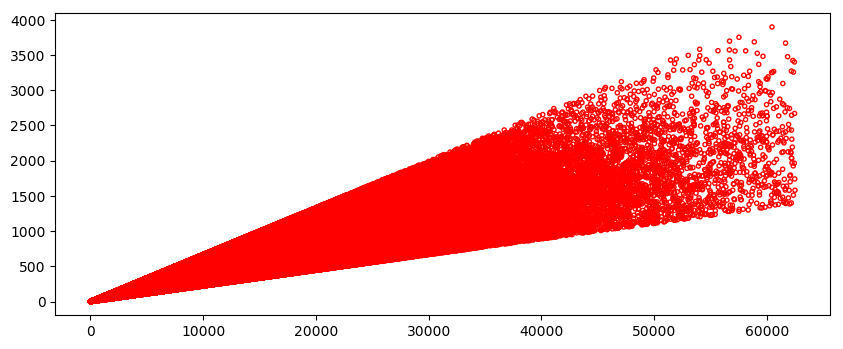

In [13]:
printmd('**Steps vs Distance after noise filter**')
plt.scatter(activities_filter['steps'], activities_filter['calories'], 
            marker='.', facecolors='none', edgecolors='r')
plt.show()
plt.figure(figsize=(10, 4), dpi=100)

# Correlation: steps, distance, calories 

In [14]:
activities_filter[['calories', 'distance', 'steps']].corr()

,calories,distance,steps
calories,1.000000,0.938969,0.922543
distance,0.938969,1.000000,0.974821
steps,0.922543,0.974821,1.000000


# Histograms of processed data

**Number of steps**

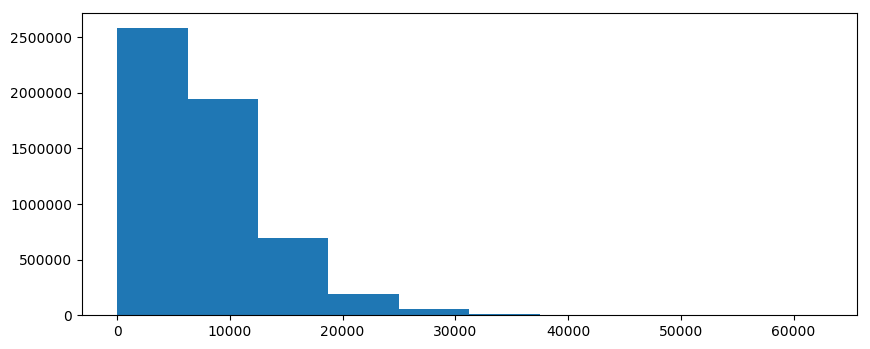

In [15]:
# Steps Histogram
printmd('**Number of steps**')
n, bins, patches = plt.hist(
    list(activities_filter['steps'].values), bins = 10)
plt.show()

**Distance**

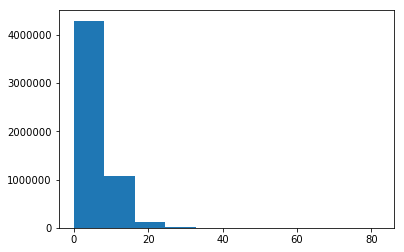

In [16]:
# Distance Histogram
printmd('**Distance**')
n, bins, patches = plt.hist(
    list(activities_filter['distance'].values), bins = 10)
plt.show()

**Calories**

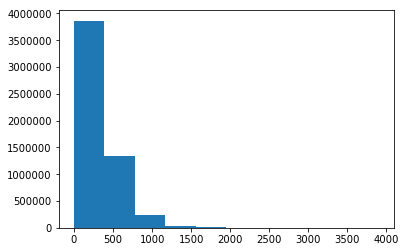

In [17]:
# Calories Histogram
printmd('**Calories**')
n, bins, patches = plt.hist(
    list(activities_filter['calories'].values), bins = 10)
plt.show()

In [18]:
with open('../data/filtered/activities_filter.pickle', 'wb') as f:
    pickle.dump(activities_filter, f)